# Exercise: Multinomial Logistic Regression.


## Helper

In [13]:
import numpy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# The below helper function, 'plot_boundary' plots the boundary for a given logistic regression function

# The details are not important, but you are encouraged to review it after the exercise

def plot_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens',degree=0):
    
    
    if plot_data:
        # PLOT DATA
        ax.scatter(x[y==1,0], x[y==1,1], c='green')
        ax.scatter(x[y==0,0], x[y==0,1], c='brown')
    
    # CREATE MESH
    interval = numpy.arange(min(x.min(), y.min()),max(x.max(), y.max()),0.05)
    n = numpy.size(interval)
    x1, x2 = numpy.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = numpy.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    xxpoly = PolynomialFeatures(degree).fit_transform(xx)
    yy = model.predict(xxpoly)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if fill:
        ax.contourf(x1, x2, yy, alpha=0.5, cmap=color)
    else:
        ax.contour(x1, x2, yy, alpha=0.5, cmap=color)
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    
    return ax


# The helper function below, fits a Logistic Regression model, and plots the boundary around it using the function above

def fit_and_plot_dt(x, y, c, title, ax, plot_data=True, fill=True, color='Blues',degree=0):

    lreg = LogisticRegression(C=c, max_iter=6000)

    x1 = PolynomialFeatures(degree).fit_transform(x)
    lreg.fit(x1, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_boundary(x, y, lreg, title, ax, plot_data, fill, color,degree=degree)
    
    return ax

In [14]:
# Import required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score

In [15]:
# Load the file "land_type.csv" into a dataframe

df = pd.read_csv("land_type.csv")

df.head()

,latitude,longitude,land_type
0,-3.226989,-0.356542,0.0
1,-1.496209,0.416730,1.0
2,0.995726,-0.887490,1.0
3,0.633447,-1.898605,1.0
4,-0.076218,-0.794730,1.0


In [16]:
df.shape

(200, 3)

In [17]:
# Assign the variable 'X' to the predictors & 'y' to the response 

# NOTE: Don't convert to numpy arrays (with .values)

X = df[['latitude','longitude']]

y = df['land_type']

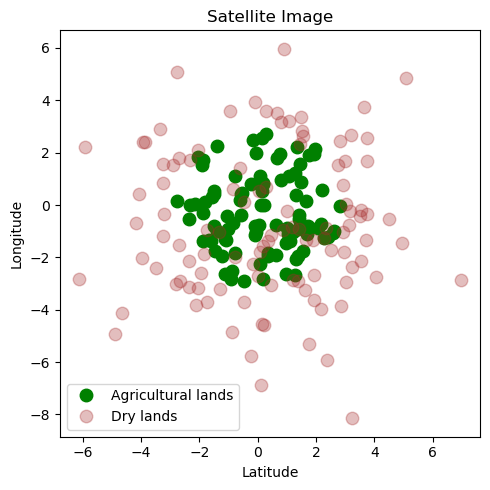

In [18]:
# To visualise the trend, plot the response variables with the predictors (Latitude & Longitude)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot the latitude vs longitude values  for y==1
# NOTE: use df[colname][y==1] to get values for 'latitude' & 'longtitude'
   
ax.plot(df['latitude'][y==1], df['longitude'][y==1], 'o',c='green', markersize=9,label='Agricultural lands')

# Repeat the same, but for y==0

ax.plot(df['latitude'][y==0], df['longitude'][y==0], 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

# Add labels

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

In [19]:
# Split the dataset, with random state = 22

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=22)

In [20]:
# Make a logistic regression model with below given C value

cval = 1e-5

lr = LogisticRegression(C=cval, max_iter=16000)

# Use Polynomial features to make a response variable of degree 10

degree = 10

X_poly_train = PolynomialFeatures(degree=degree).fit_transform(X_train)

X_poly_val = PolynomialFeatures(degree=degree).fit_transform(X_val)

In [21]:
### edTest(test_accuracy) ###

# Fit the model with training data 

lr.fit(X_poly_train, y_train)

# Make predictions on the validation data

y_val_pred = lr.predict(X_poly_val)

validation_accuracy = accuracy_score(y_val, y_val_pred)

print("Accuracy=",validation_accuracy)

Accuracy= 0.75


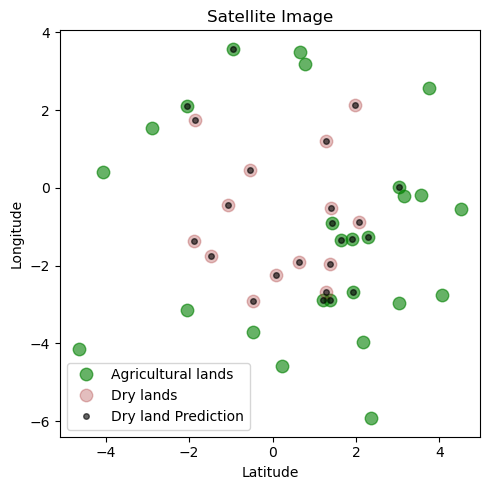

In [22]:
# Use the below helper code to visualise the number of dry land predictions our model got correct

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

xlat_0 = X_val.values[y_val==0,0]
xlong_0 = X_val.values[y_val==0,1]

ax.plot(xlat_0, xlong_0, 'o',c='green',alpha = 0.6, markersize=9,label='Agricultural lands')

xlat_1 = X_val.values[y_val==1,0]
xlong_1 = X_val.values[y_val==1,1]

ax.plot(xlat_1, xlong_1, 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

xlat_pred_1 = X_val.values[y_val_pred==1,0]
xlong_pred_1 = X_val.values[y_val_pred==1,1]
ax.plot(xlat_pred_1, xlong_pred_1, 'o',c='black', alpha = 0.6, markersize=4,label='Dry land Prediction')


ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

In [23]:
new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 3, size=200)
new_data = np.hstack((new_data, np.zeros((200, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])

X = new_data[:, :-1]
y = new_data[:, -1]

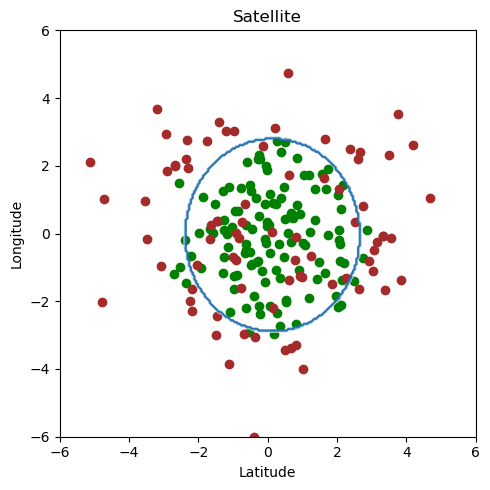

In [25]:
# We will use a custom function called fit_and_plot_dt
# If you are curious about it, look for the file `helper.py` in the root directory

#from helper import fit_and_plot_dt

fig, ax = plt.subplots(figsize=(5, 5))

# Choose the C_value and the degree of the polynomial for the polynomial logistic regression
# A C value of 1e15 is extremely large and the equivalent of no regularization  

C_value = 1e15

degree = 2

# The helper function below

ax = fit_and_plot_dt(X, y, C_value, 'Satellite',ax, plot_data=True, fill=False,degree=degree) 

# Setting the limits to better visualsize the plot

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.tight_layout()
plt.show() 

# Exercise: Comparing predictors

In [26]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# Read the "Heart.csv" dataset
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
# split into train and validation
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 109)

print(heart_train.shape, heart_val.shape)

(303, 15)
(227, 15) (76, 15)


In [28]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [29]:
predictors = ['Chol','MaxHR']

x_train = heart_train[predictors]
poly = PolynomialFeatures(degree=3,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
y_train = heart_train['AHD']

lr = LogisticRegression(penalty=None, max_iter = 5000).fit(x_train_poly, y_train)
y_pred = lr.predict(x_train_poly)

print("Logistic Regression accuracy:", accuracy_score(y_train, y_pred))

Logistic Regression accuracy: 0.6784140969162996


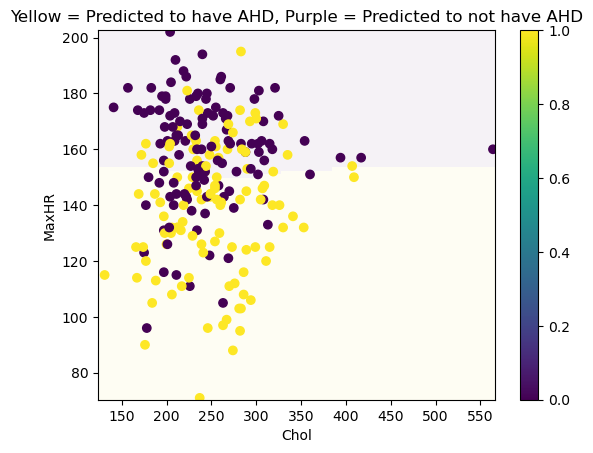

In [30]:
x1=np.linspace(heart[['Chol']].min(),heart[['Chol']].max(),100)
x2=np.linspace(heart[['MaxHR']].min(),heart[['MaxHR']].max(),100)
x1v, x2v = np.meshgrid(x1, x2)
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = poly.fit_transform(X)
yhat = lr.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Chol'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Chol")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

In [38]:
### edTest(test_modified_outputs) ###
# here we are going to create new dataframes based on x_train
# where we will modify each dataframe slightly
# by adding and subtracting by a standard deviation of a feature
# to see how the model outcomes change

def get_num_modified_outputs(predictor, x_change):

    #create a copy of the training data
    x_copy = x_train.copy()

    # modify the predictor by the value x_change
    x_copy[predictor] = x_copy[predictor] + x_change

    # apply the degree-3 polynomial transform to x_copy
    x_copy_poly = PolynomialFeatures(degree=3,include_bias=False).fit_transform(x_copy,y_train)
    
    # create predictions for x_copy_poly using the logistic regression model (lr)
    y_pred_modified = lr.predict(x_copy_poly)
    
    # calculate the number of outputs that changed from y_pred to y_pred_modified
    n_changed_outputs = np.count_nonzero((y_pred - y_pred_modified)!=0)

    return n_changed_outputs

# get standard deviation of each variable
# so that we can modify each variable
# while respecting the size/spread of that predictor in the data
# (another valid way would be to scale our data at the beginning of this exercise)
stdev_MaxHR = heart_train['MaxHR'].std()
stdev_Chol = heart_train['Chol'].std()

# get the number of modified outputs
# when modifying each variable up and down
# by 0.5 of its standard deviation
n_modify_chol_up = get_num_modified_outputs('Chol', 0.5*stdev_Chol)
n_modify_chol_down = get_num_modified_outputs('Chol', -0.5*stdev_Chol)
n_modify_maxhr_up = get_num_modified_outputs('MaxHR', 0.5*stdev_MaxHR)
n_modify_maxhr_down = get_num_modified_outputs('MaxHR', -0.5*stdev_MaxHR)

print('# outputs changed by increasing Chol:', n_modify_chol_up)
print('# outputs changed by decreasing Chol:', n_modify_chol_down)
print('# outputs changed by increasing MaxHR:', n_modify_maxhr_up)
print('# outputs changed by decreasing MaxHR:', n_modify_maxhr_down)


# outputs changed by increasing Chol: 5
# outputs changed by decreasing Chol: 5
# outputs changed by increasing MaxHR: 43
# outputs changed by decreasing MaxHR: 53


# Exercise: Dealing with Missingness

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer, KNNImputer

In [48]:
# Number of data points to generate
n = 500
# Set random seed for numpy to ensure reproducible results
np.random.seed(109)
# Generate our predictors...
x1 = np.random.normal(0, 1, size=n)
x2 = 0.5*x1 + np.random.normal(0, np.sqrt(0.75), size=n)
X = pd.DataFrame(data=np.transpose([x1,x2]),columns=["x1","x2"])
# Generate our response...
y = 3*x1 - 2*x2 + np.random.normal(0, 1, size=n)
y = pd.Series(y)
# And put them all in a nice DataFrame
df = pd.DataFrame(data=np.transpose([x1, x2, y]), columns=["x1", "x2", "y"]) 

In [49]:
df.head()

,x1,x2,y
0,-0.187735,1.190834,-1.687270
1,2.440637,2.214195,3.816174
2,-0.940908,-0.474695,-0.564044
3,0.613912,1.434117,-2.632183
4,0.735627,1.282782,0.133237


In [50]:
df.shape

(500, 3)

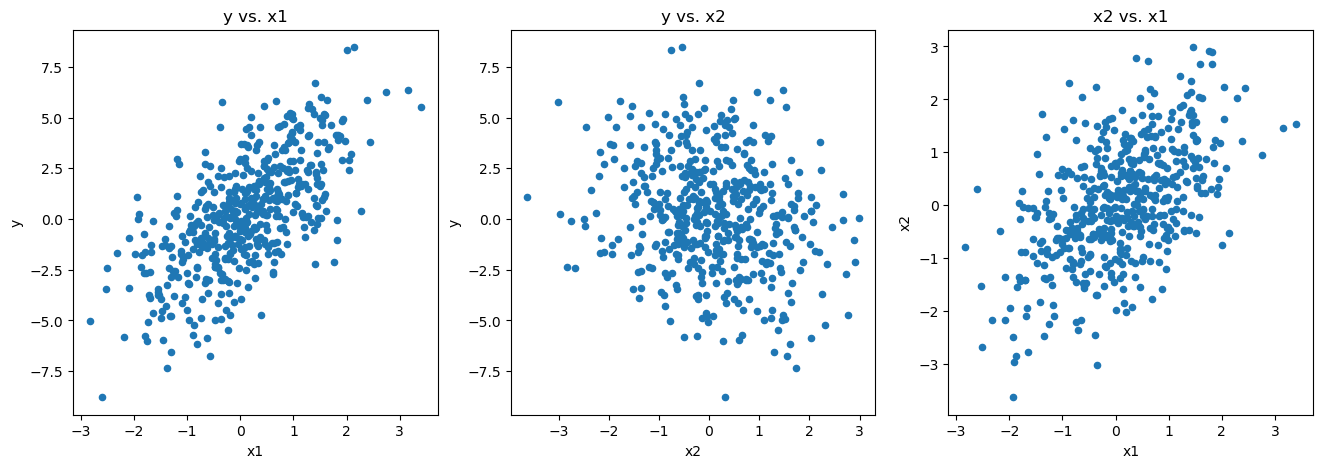

In [51]:
fig, axs =  plt.subplots(1, 3, figsize = (16,5))

plot_pairs = [('x1', 'y'), ('x2', 'y'), ('x1', 'x2')]
for ax, (x_var, y_var) in zip(axs, plot_pairs):
    df.plot.scatter(x_var, y_var, ax=ax, title=f'{y_var} vs. {x_var}')

In [52]:
missing_A = np.random.binomial(1, 0.05 + 0.85*(y > (y.mean()+y.std())),  n).astype(bool)
missing_B = np.random.binomial(1, 0.2, n).astype(bool)
missing_C = np.random.binomial(1, 0.05 + 0.85*(x2 > (x2.mean()+x2.std())), n).astype(bool)

In [53]:
# Helper function to replace x_1 with nan at specified indices
def create_missing(missing_indices, df=df):
    df_new = df.copy()
    df_new.loc[missing_indices, 'x1'] = np.nan
    return df_new

In [54]:
### edTest(test_missing_type) ###

# Missing completely at random (MCAR)
df_mcar = create_missing(missing_indices=missing_B)

# Missing at random (MAR)
df_mar = create_missing(missing_indices=missing_C)

# Missing not at random (MNAR)
df_mnar = create_missing(missing_indices=missing_A)

In [55]:
# no missingness: on the full dataset
ols = LinearRegression().fit(df[['x1', 'x2']], df['y'])
print('No missing data:', ols.intercept_, ols.coef_)

No missing data: 0.10204379528391672 [ 2.92281015 -1.93658251]


In [56]:
# Fit inside a try/except block just in case...
try:
    ouch = LinearRegression().fit(df_mcar[['x1','x2']],df_mcar['y'])
except Exception as e:
    print(e)

Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [57]:
# MCAR: drop the rows that have any missingness
ols_mcar = LinearRegression().fit(df_mcar.dropna()[['x1', 'x2']], df_mcar.dropna()['y'])
print('MCAR (drop):', ols_mcar.intercept_, ols_mcar.coef_)

MCAR (drop): 0.09607569437217287 [ 2.95778269 -1.90922895]


In [58]:
### edTest(test_mar) ###
# MAR: drop the rows that have any missingness
ols_mar = LinearRegression().fit(df_mar.dropna()[['x1', 'x2']], df_mar.dropna()['y'])
print('MAR (drop):', ols_mar.intercept_,ols_mar.coef_)

MAR (drop): 0.14606481117880465 [ 2.93256228 -1.89351279]


In [59]:
# MNAR: drop the rows that have any missingness
ols_mnar = LinearRegression().fit(df_mnar.dropna()[['x1', 'x2']], df_mnar.dropna()['y'])
print('MNAR (drop):', ols_mnar.intercept_, ols_mnar.coef_)

MNAR (drop): 0.020221283325560724 [ 2.77095031 -1.84859735]


In [60]:
# Make backup copies for later since we'll have lots of imputation approaches.
X_mcar_raw = df_mcar.drop('y', axis=1).copy()
X_mar_raw = df_mar.drop('y', axis=1).copy()
X_mnar_raw = df_mnar.drop('y', axis=1).copy()

In [61]:
# Here's an example of one way to do the mean imputation with the above methods
X_mcar = X_mcar_raw.copy()
X_mcar['x1'] = X_mcar['x1'].fillna(X_mcar['x1'].mean())
# Another approach
# df = df.fillna(df.mean)
# This will replace all nans in a df with each column's mean

ols_mcar_mean = LinearRegression().fit(X_mcar, y)
print('MCAR (mean):', ols_mcar_mean.intercept_, ols_mcar_mean.coef_)

MCAR (mean): 0.06518722125657422 [ 2.76751051 -1.56434888]


In [62]:
### edTest(test_mar_mean) ###
X_mar = X_mar_raw.copy()
# You can add as many lines as you see fit, so long as the final model is correct
X_mar['x1'] = X_mar['x1'].fillna(X_mar['x1'].mean())
ols_mar_mean = LinearRegression().fit(X_mar, y)
print('MAR (mean):',ols_mar_mean.intercept_, ols_mar_mean.coef_)

MAR (mean): 0.3922738786668911 [ 2.62546455 -1.22434111]


In [63]:
### edTest(test_mnar_mean) ###
X_mnar = X_mnar_raw.copy()
# instantiate imputer object
imputer = SimpleImputer(strategy='mean')
# fit & transform X_mnar with the imputer
X_mnar = imputer.fit_transform(X_mnar)
# fit OLS model on imputed data
ols_mnar_mean = LinearRegression().fit(X_mnar, y)
print('MNAR (mean):', ols_mnar_mean.intercept_, ols_mnar_mean.coef_)

MNAR (mean): 0.520706160894387 [ 2.64232555 -1.67075578]


In [64]:
X_mcar = X_mcar_raw.copy()

# Fit the imputation model
ols_imputer_mcar = LinearRegression().fit(X_mcar.dropna()[['x2']], X_mcar.dropna()['x1'])

# Perform some imputations
x1hat_impute = pd.Series(ols_imputer_mcar.predict(X_mcar[['x2']]))
X_mcar['x1'] = X_mcar['x1'].fillna(x1hat_impute)

# Fit the model we care about
ols_mcar_ols = LinearRegression().fit(X_mcar, y)
print('MCAR (OLS):', ols_mcar_ols.intercept_,ols_mcar_ols.coef_)

MCAR (OLS): 0.11835122909536361 [ 2.95778269 -1.91346654]


In [69]:
### edTest(test_mar_ols) ###
X_mar = X_mar_raw.copy()
# Fit imputation model
ols_imputer_mar = LinearRegression().fit(X_mar.dropna()[['x2']], X_mar.dropna()['x1'])
# Get values to be imputed
x1hat_impute = pd.Series(ols_imputer_mar.predict(X_mar[['x2']]))
# Fill missing values with imputer's predictions
X_mar['x1'] = X_mar['x1'].fillna(x1hat_impute)
# Fit our final, 'substantive' model
ols_mar_ols = LinearRegression().fit(X_mar, y)

print('MAR (OLS):', ols_mar_ols.intercept_,ols_mar_ols.coef_)

MAR (OLS): 0.007334836526979499 [ 2.93256228 -1.99438598]


In [70]:
### edTest(test_mnar_ols) ###
X_mnar = X_mnar_raw.copy()
# your code here
# You can add as many lines as you see fit, so long as the final model is correct
ols_imputer_mnar = LinearRegression().fit(X_mnar.dropna()[['x2']], X_mnar.dropna()['x1'])
x1hat_impute = pd.Series(ols_imputer_mnar.predict(X_mnar[['x2']]))
X_mnar['x1'] = X_mnar['x1'].fillna(x1hat_impute)
ols_mnar_ols = LinearRegression().fit(X_mnar, y)
print('MNAR (OLS):', ols_mnar_ols.intercept_, ols_mnar_ols.coef_)

MNAR (OLS): 0.6148065869266277 [ 2.77095031 -1.97302957]


In [71]:
X_mcar = X_mcar_raw.copy()

X_mcar = KNNImputer(n_neighbors=3).fit_transform(X_mcar)

ols_mcar_knn = LinearRegression().fit(X_mcar,y)

print('MCAR (KNN):', ols_mcar_knn.intercept_,ols_mcar_knn.coef_)

MCAR (KNN): 0.15134915515799063 [ 2.78459666 -1.85426345]


In [72]:
### edTest(test_mar_knn) ###
X_mar = X_mar_raw.copy()
# Add imputed values to X_mar
X_mar = KNNImputer(n_neighbors=3).fit_transform(X_mar)
# Fit substantive model on imputed data
ols_mar_knn = LinearRegression().fit(X_mar,y)

print('MAR (KNN):', ols_mar_knn.intercept_,ols_mar_knn.coef_)

MAR (KNN): 0.24560978941317949 [ 2.72661518 -1.55667191]


In [73]:
### edTest(test_mnar_knn) ###
X_mnar = X_mnar_raw.copy()
# your code here
# You can add as many lines as you see fit, so long as the final model is correct
X_mnar = KNNImputer(n_neighbors=3).fit_transform(X_mnar)
ols_mnar_knn = LinearRegression().fit(X_mnar,y)

print('MNAR (KNN):', ols_mnar_knn.intercept_,ols_mnar_knn.coef_)

MNAR (KNN): 0.635851123451955 [ 2.62065071 -1.93067768]
